In [1]:
import os
if os.getcwd().endswith('notebooks'):
    os.chdir('..')

In [2]:
from notebooks.models import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# load results 

input_data = pd.read_csv('results/06_sensitivity_analysis/lognormal_input_data.csv')
tau_data = pd.read_csv('results/06_sensitivity_analysis/lognormal_tau_data.csv')
age_data = pd.read_csv('results/06_sensitivity_analysis/lognormal_age_data.csv')
site_data = pd.read_csv('results/processed_balesdant_2018.csv')

green_colors = plt.cm.Greens(np.linspace(0.2, 0.8, 5))
red_colors = plt.cm.Reds(np.linspace(0.2, 0.8, 5))
blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, 5))

def plot_data(ax, data, colors, title_label, legend_label):
    ts = data.loc['time']
    df = data.drop(index=['time'])
    for j, (index, row) in enumerate(df.iterrows()):
        ax.semilogx(ts, row, color=colors[j], label=f'{legend_label} = {index}')
        ax.set_xlabel('Time (years)')
        ax.set_ylabel('Fraction of labeled carbon')
        ax.legend(loc='upper left')
        sns.regplot(data=site_data, x="Duration_labeling", y="total_fnew",ax=ax,scatter_kws={'color':'k'},line_kws={'color':'k','lw':0},x_bins=[3,10,30,50,100,300,1000,3000],fit_reg=False,ci=95)
        ax.set_title(title_label)

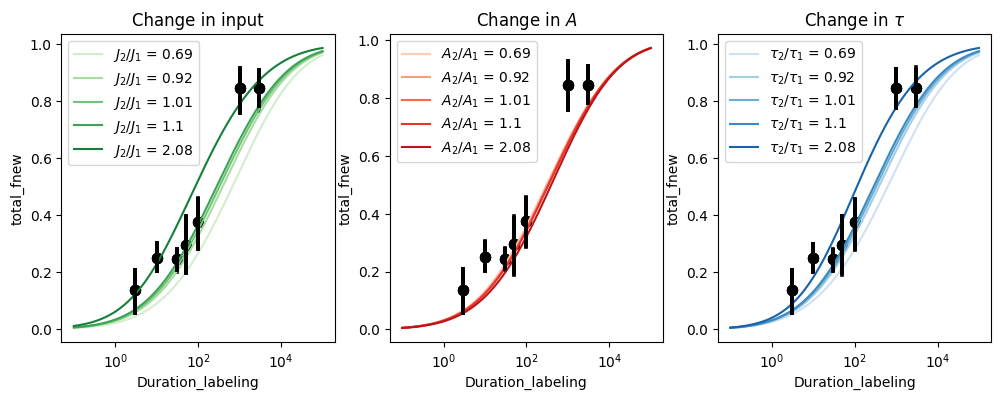

In [48]:

fig, axs = plt.subplots(1, 3, figsize=(12, 4))    
plot_data(axs[0], input_data.T, green_colors, 'Change in input', '$J_2$/$J_1$')
plot_data(axs[1], age_data.T, red_colors, 'Change in $A$', '$A_2$/$A_1$')
plot_data(axs[2], tau_data.T, blue_colors, 'Change in $\\tau$', '$\\tau_2$/$\\tau_1$')
